'分析小结\n    由上面实验结果可知，当steps的值越来越大，步长越来越大时，噪点的存在就越来越少，\n    实验图片中的物体纹理愈发明显，但是会丧失许多细节，图片画面过于平滑。所以步长应取适中，以下实验取为20。\n\n    由上图的实验结果可以看到，当随着窗口大小不断增大时，可以看到视差图的噪点不断减少，\n    并且图片的细节也不断变少，实验图片中含有的具体细节都有被一定的平滑抹去掉，\n    但由于窗口增大后的边缘逐渐模糊，也更有利于我们判断物体边缘。所以可以显而易见地得出对于wid的取值，\n    我们应该要视情况而定，一般取适中即可，不可过大或过小。\n    并且，在匹配算法是我们追求的更多是对于位置特征的准确性，需要较多的细节，所以wid取值可以偏小，大约为10即可。\n'

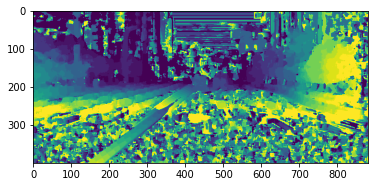

In [10]:
from PIL import Image
from pylab import *
from numpy import *
from numpy.ma import array
from scipy import ndimage
def plane_sweep_ncc(im_l,im_r,start,steps,wid):
    """ 使用归一化的互相关计算视差图像 """
    m,n = im_l.shape
    # 保存不同求和值的数组
    mean_l = zeros((m,n))
    mean_r = zeros((m,n))
    s = zeros((m,n))
    s_l = zeros((m,n))
    s_r = zeros((m,n))
    # 保存深度平面的数组
    dmaps = zeros((m,n,steps))
    # 计算图像块的平均值
    ndimage.uniform_filter(im_l,wid,mean_l)
    ndimage.uniform_filter(im_r,wid,mean_r)
    # 归一化图像
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r
    # 尝试不同的视差
    for displ in range(steps):
        # 将左边图像移动到右边，计算加和
        ndimage.uniform_filter(np.roll(norm_l, -displ - start) * norm_r, wid, s) # 和归一化
        ndimage.uniform_filter(np.roll(norm_l, -displ - start) * np.roll(norm_l, -displ - start), wid, s_l)
        ndimage.uniform_filter(norm_r*norm_r,wid,s_r) # 和反归一化
        # 保存 ncc 的分数
        dmaps[:,:,displ] = s / sqrt(abs(s_l * s_r))
        # 为每个像素选取最佳深度
    return np.argmax(dmaps, axis=2)

def plane_sweep_gauss(im_l,im_r,start,steps,wid):
 """ 使用带有高斯加权周边的归一化互相关计算视差图像 """
 m,n = im_l.shape
 # 保存不同加和的数组
 mean_l = zeros((m,n))
 mean_r = zeros((m,n))
 s = zeros((m,n))
 s_l = zeros((m,n))
 s_r = zeros((m,n))
 # 保存深度平面的数组
 dmaps = zeros((m,n,steps))
 # 计算平均值
 ndimage.gaussian_filter(im_l,wid,0,mean_l)
 ndimage.gaussian_filter(im_r,wid,0,mean_r)
 # 归一化图像
 norm_l = im_l - mean_l
 norm_r = im_r - mean_r
 # 尝试不同的视差
 for displ in range(steps):
     # 将左边图像移动到右边，计算加和
     ndimage.gaussian_filter(np.roll(norm_l, -displ - start) * norm_r, wid, 0, s) # 和归一化
     ndimage.gaussian_filter(np.roll(norm_l, -displ - start) * np.roll(norm_l, -displ - start), wid, 0, s_l)
     ndimage.gaussian_filter(norm_r*norm_r,wid,0,s_r) # 和反归一化
     # 保存 ncc 的分数
     dmaps[:,:,displ] = s / np.sqrt(s_l * s_r)
 # 为每个像素选取最佳深度
 return np.argmax(dmaps, axis=2)

im_l = array(Image.open(r'resources\Dataset\2018-07-09-16-11-56_2018-07-09-16-11-56-702-left.jpg').convert('L'), 'f')
im_r = array(Image.open(r'resources\Dataset\2018-07-09-16-11-56_2018-07-09-16-11-56-702-right.jpg').convert('L'),'f')
# 开始偏移，并设置步长
steps = 20
start = 4
# ncc 的宽度
wid = 10
res = plane_sweep_ncc(im_l,im_r,start,steps,wid)

imshow(res)
"""分析小结
    由上面实验结果可知，当steps的值越来越大，步长越来越大时，噪点的存在就越来越少，
    实验图片中的物体纹理愈发明显，但是会丧失许多细节，图片画面过于平滑。所以步长应取适中，以下实验取为20。

    由上图的实验结果可以看到，当随着窗口大小不断增大时，可以看到视差图的噪点不断减少，
    并且图片的细节也不断变少，实验图片中含有的具体细节都有被一定的平滑抹去掉，
    但由于窗口增大后的边缘逐渐模糊，也更有利于我们判断物体边缘。所以可以显而易见地得出对于wid的取值，
    我们应该要视情况而定，一般取适中即可，不可过大或过小。
    并且，在匹配算法是我们追求的更多是对于位置特征的准确性，需要较多的细节，所以wid取值可以偏小，大约为10即可。
"""
